## OTT EDA
- 목표: Netflix, Amazon Prime, Disney+, Hulu 컨텐츠 프로바이더들의 컨텐츠에 대해서 알아보기

In [1]:
##한글 폰트 사용시 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

netflix= pd.read_csv('../content/netflix_titles.csv')
disney= pd.read_csv('../content/disney_plus_titles.csv')
amazon= pd.read_csv('../content/amazon_prime_titles.csv')
hulu= pd.read_csv('../content/hulu_titles.csv')

netflix['ott']='netflix'
disney['ott']='disney'
amazon['ott']='amazon'
hulu['ott']='hulu'
ott= pd.concat([netflix,disney,amazon, hulu])

### 컨텐츠 양
- 넷플릭스 8807, 디즈니 1450,아마존 9968, 훌루 3073개
- 아마존, 넷플릭스가 압도적으로 많음

In [3]:
display(netflix.shape,disney.shape,amazon.shape,hulu.shape)

(8807, 13)

(1450, 13)

(9668, 13)

(3073, 13)

In [4]:
display(netflix.count(),disney.count(),amazon.count(),hulu.count())

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
ott             8807
dtype: int64

show_id         1450
type            1450
title           1450
director         977
cast            1260
country         1231
date_added      1447
release_year    1450
rating          1447
duration        1450
listed_in       1450
description     1450
ott             1450
dtype: int64

show_id         9668
type            9668
title           9668
director        7586
cast            8435
country          672
date_added       155
release_year    9668
rating          9331
duration        9668
listed_in       9668
description     9668
ott             9668
dtype: int64

show_id         3073
type            3073
title           3073
director           3
cast               0
country         1620
date_added      3045
release_year    3073
rating          2553
duration        2594
listed_in       3073
description     3069
ott             3073
dtype: int64

In [5]:
display(netflix.info(),disney.info(),amazon.info(),hulu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  ott           8807 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       

None

None

None

None

### 결측치 확인
- 제거할 필요없는 컬럼 확인
    - show_id, date_added,country
- Genre값 ott별로 상이함
- HULU 데이터셋 결측치로 인해서 TMDB에서 데이터 수집해서 결측치를 채울 예정
    - 한국에서 서비스할 예정 없음
    - 디즈니+ 자회사이기도 해서 어느정도의 오리지널 컨텐츠를 디즈니+에서 볼 수 있기도 하지만 차별화 두려함

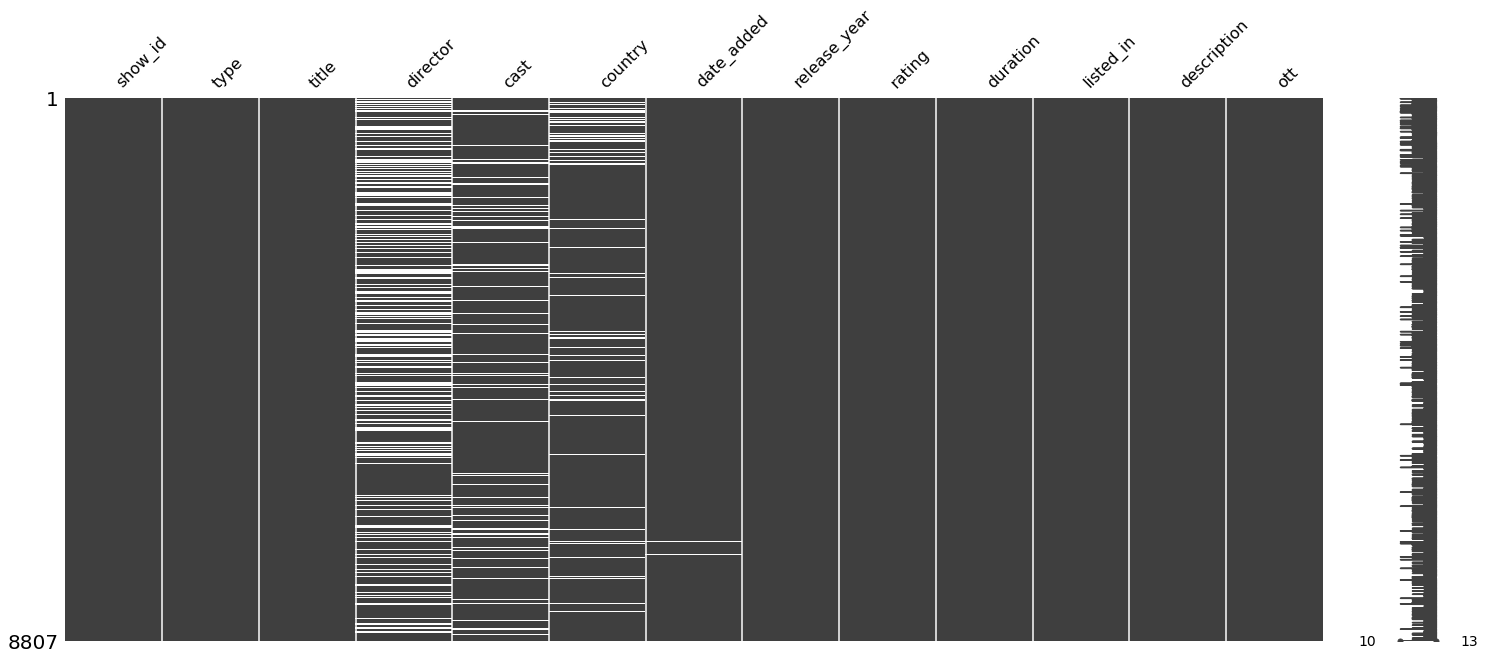

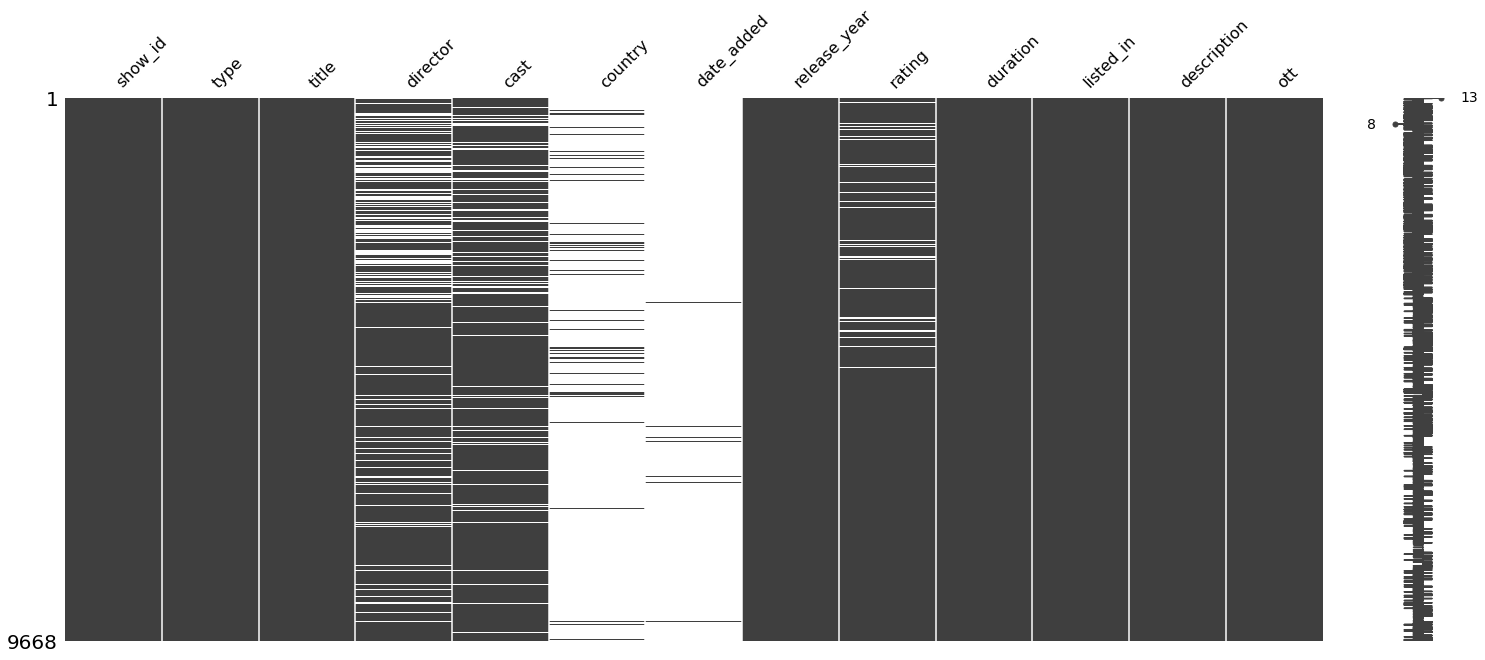

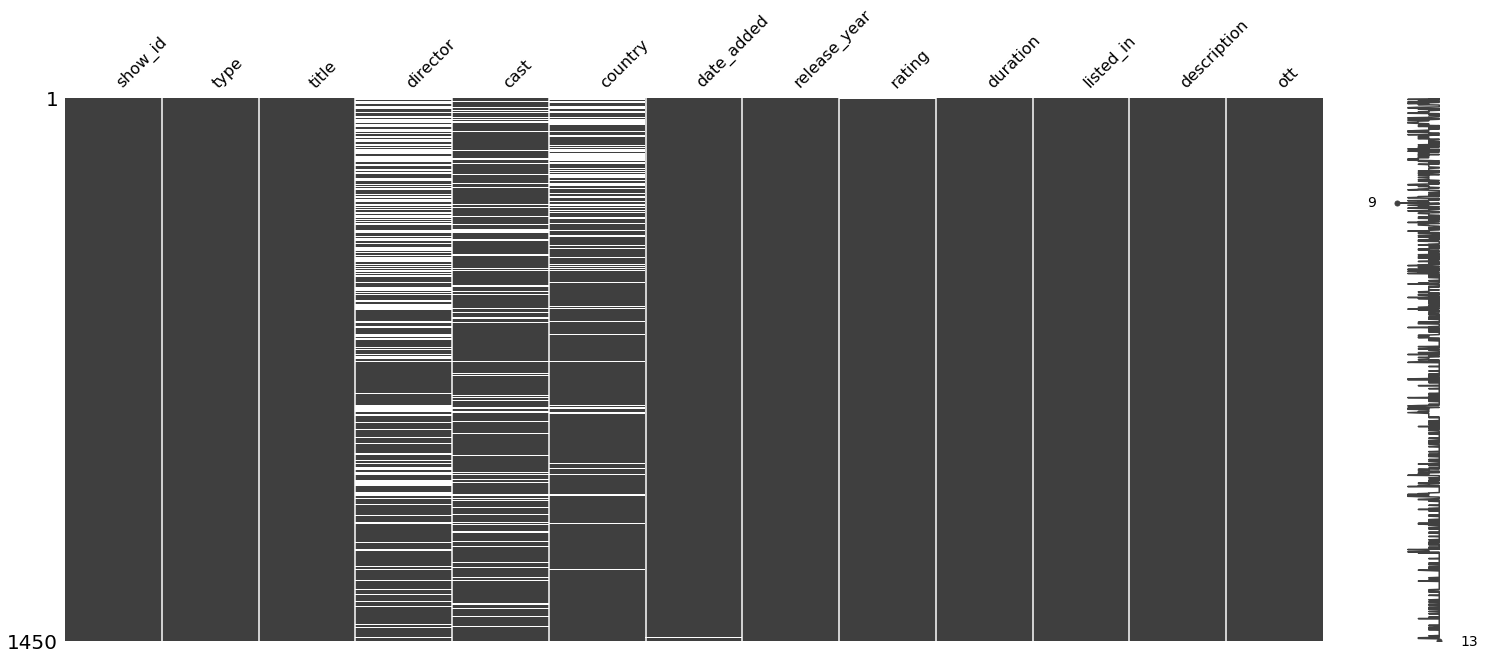

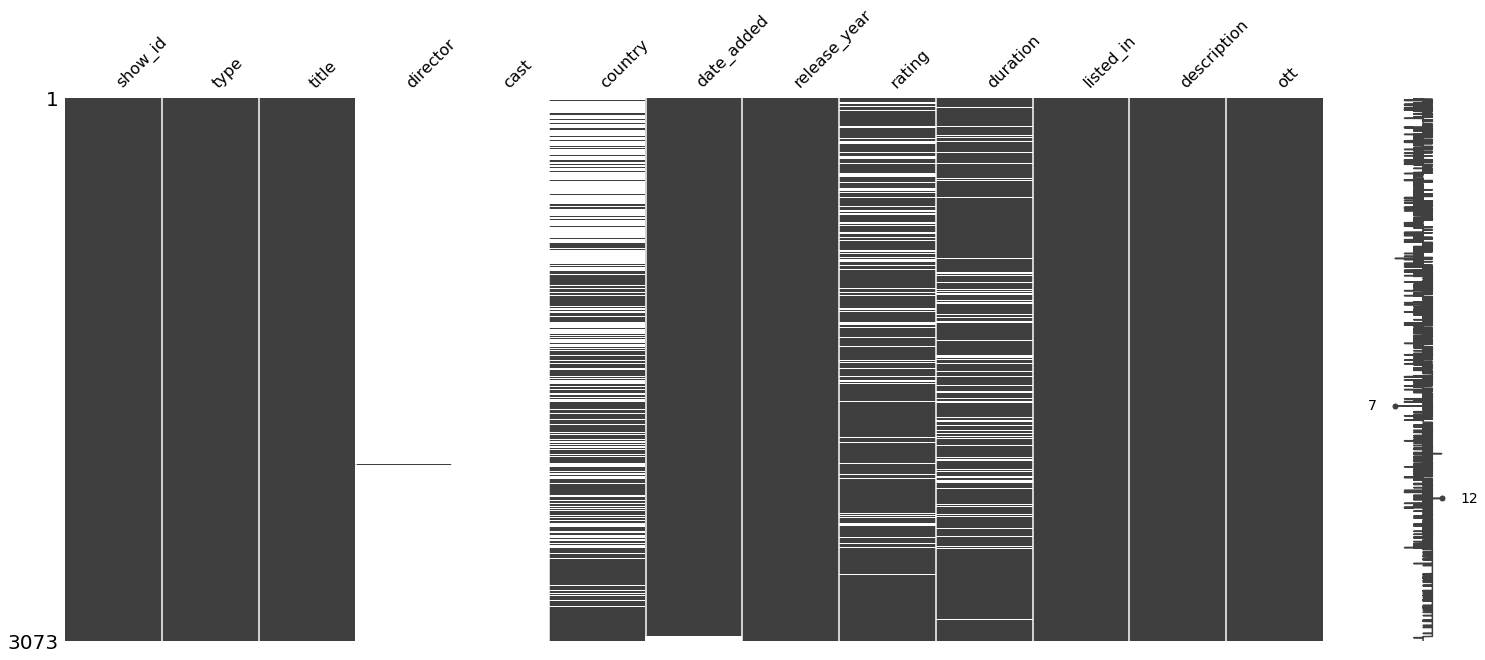

In [6]:
msno.matrix(netflix)
msno.matrix(amazon)
msno.matrix(disney)
msno.matrix(hulu) #director, cast 결측치

plt.show()

#### 각 OTT 별로 영화, 티비 시리즈 수
- 아마존, 넷플릭스는 영화에 집중,특히 아마존은 방대한 영화 양으로 승부
- 디즈니+ 와 훌루는 비슷하나 전반적인 양은 부족(오리지널 컨텐츠에 집중하는 듯)
  - 오리지널 데이터 찾아 추가하면 좋을것 같다

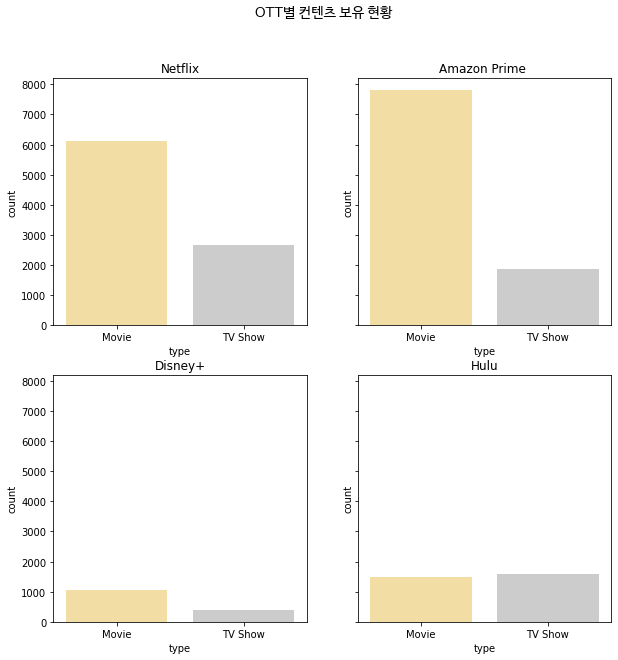

In [29]:
fig, axes = plt.subplots(2, 2, sharey=True,figsize=(10,10))

fig.suptitle('OTT별 컨텐츠 보유 현황', fontsize=14, family='NanumBarunGothic')
colors = ["#FFBB00", "gray"]

ax = sns.countplot( ax = axes[0][0],x="type", data=netflix,palette=colors,alpha=0.4)\
    .set(title='Netflix')
ax = sns.countplot( ax = axes[0][1],x="type", data=amazon,palette=colors,alpha=0.4)\
    .set(title='Amazon Prime ')
ax = sns.countplot( ax = axes[1][0],x="type", data=disney,palette=colors,alpha=0.4)\
    .set(title='Disney+')
ax = sns.countplot( ax = axes[1][1],x="type", data=hulu,palette=colors,alpha=0.4)\
    .set(title='Hulu')

### 영상물 등급 제도 별 컨텐츠 수
기준 참고: [Neflix](https://help.netflix.com/ko/node/2064/us)
#### Kids
- G Suitable for General Audiences 전체이용가
- TV-G Suitable for General Audiences 전체이용가
- TV-Y Designed to be appropriate for all children 유아용

###### 부모지도 권장
- TV-Y7 Suitable for ages 7 and up 7살이상
- PG Parental Guidance suggested 부모 지도 권장
- TV-PG Parental Guidance suggested 부모 지도 권장

#### Teens
- PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under. 부모 지도 필요, 12세 미만 청소년 부적절

- TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under. 부모 지도 필요, 14세 미만 청소년 부적절

#### Adults
- R: Restricted. May be inappropriate for ages 17 and under. .17세 미만 청소년 부적절
- TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.17세 미만 청소년 부적절
- NC-17: Inappropriate for ages 17 and under 17세 미만 청소년 부적절

In [66]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

def rating_barplot(data, title=None):
    '''
    데이터를 영화, 티비, 전체 기반으로 countplot 간단하게 시각화
    '''
    if title=='TV Show':
        data=data[data['type']=='TV Show']
    elif title=='Movie':
        data=data[data['type']=='Movie']
    else:
        title.title()
    fig, ax = plt.subplots(1,1, figsize=(18, 9))
    
    sns.countplot(data=data,x='rating',order=rating_order,color='gray')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]
    axes = plt.gca()
    y_min, y_max = axes. get_ylim()
    plt.xlabel('영상물 등급 카테고리',  fontsize=15,family='NanumBarunGothic')
    plt.ylabel('갯수', fontsize=15,family='NanumBarunGothic',)
    for idx, sub_title in enumerate(['영유아','어린이','청소년','성인']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,y_max*0.9), 
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center", 
                    color="w", fontsize=16, fontweight='bold', family='NanumBarunGothic',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)
        
    if title not in ['TV Show', 'Movie'] :
        fig.suptitle(f'{title} 전체 영상물 등급', fontsize=20, fontweight='bold', family='NanumBarunGothic',
                       position=(0.5, 1.0+0.03))
    else:
        fig.suptitle(f'{title}  영상물 등급', fontsize=20, fontweight='bold', family='NanumBarunGothic',
                      position=(0.5, 1.0+0.03))
    plt.show()

 넷플릭스
 - 넷플릭스는 영화, 드라마 큰 차이 없이 성인, 10대 타겟으로한 컨텐츠가 많다

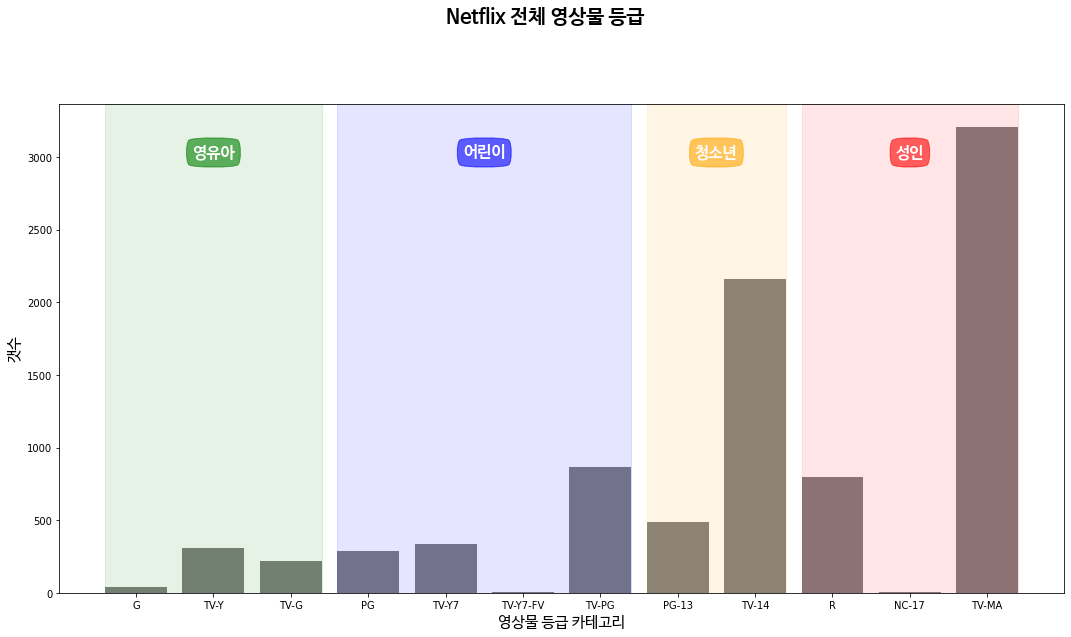

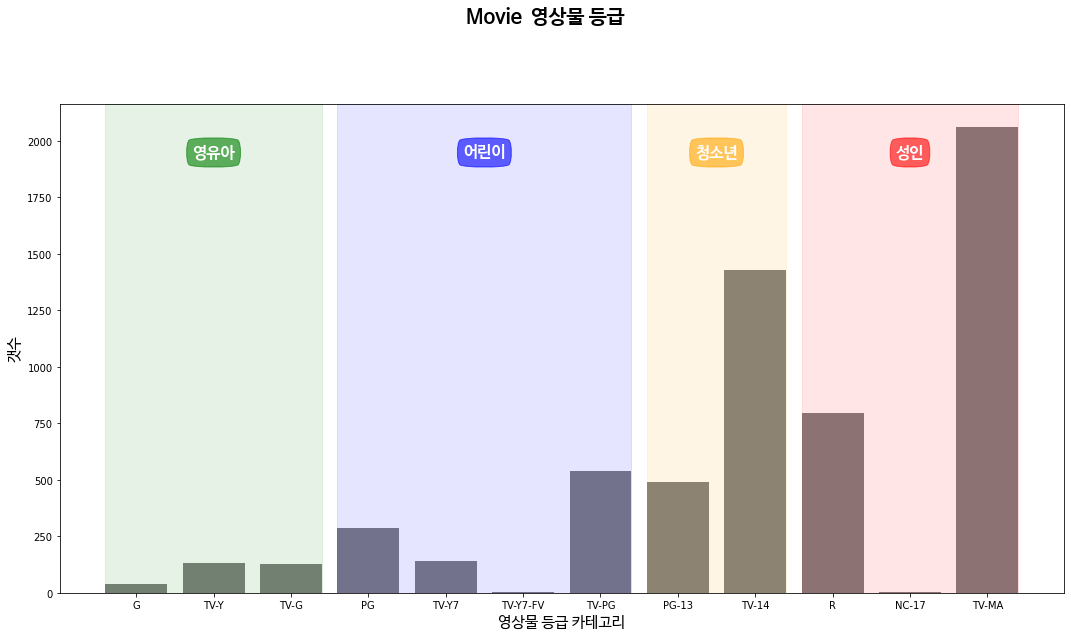

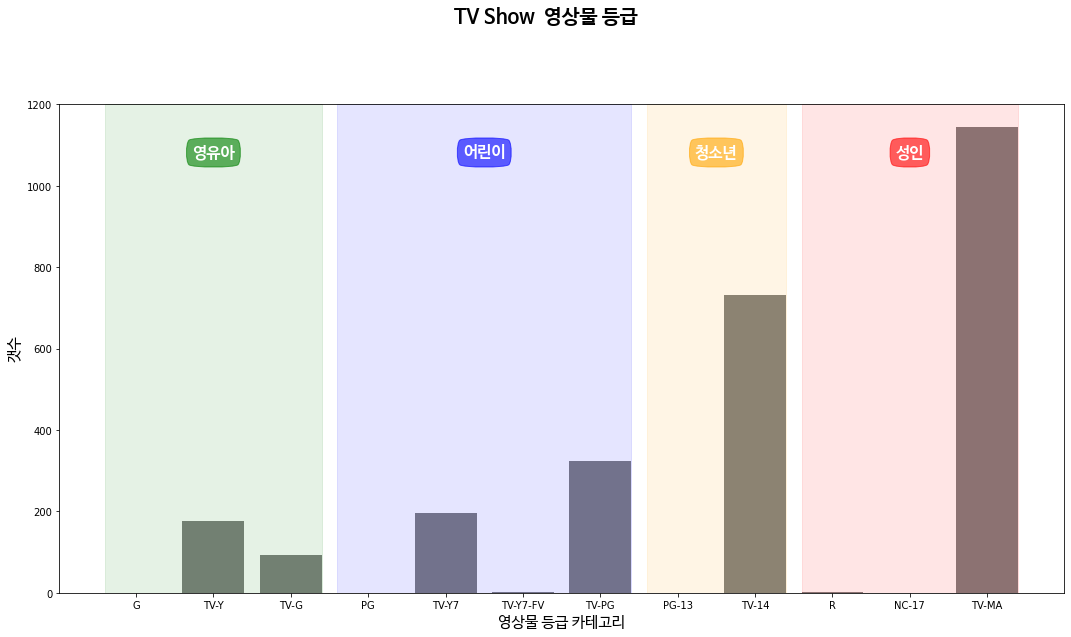

In [67]:
rating_barplot(netflix,'Netflix')
rating_barplot(netflix,'Movie')
rating_barplot(netflix,'TV Show')

Amazon 
- 성인에서 R등급 많음

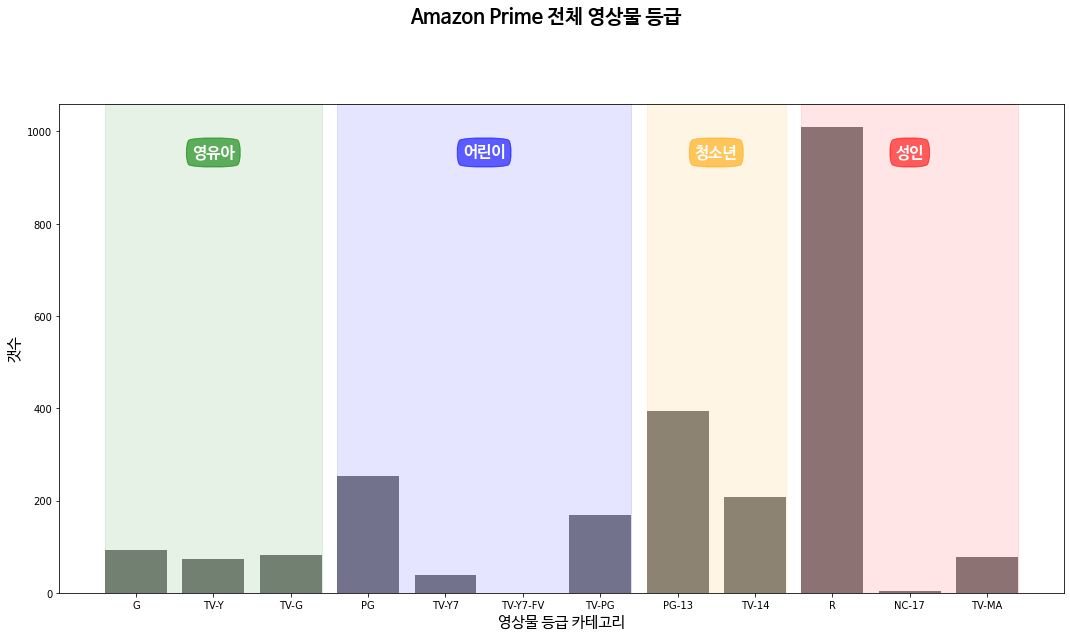

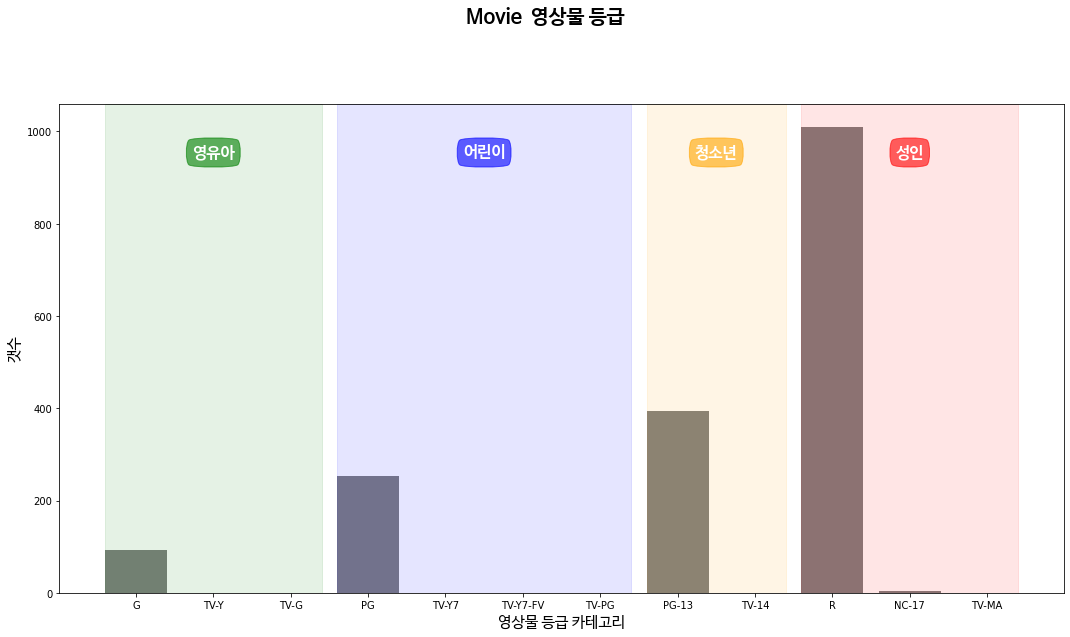

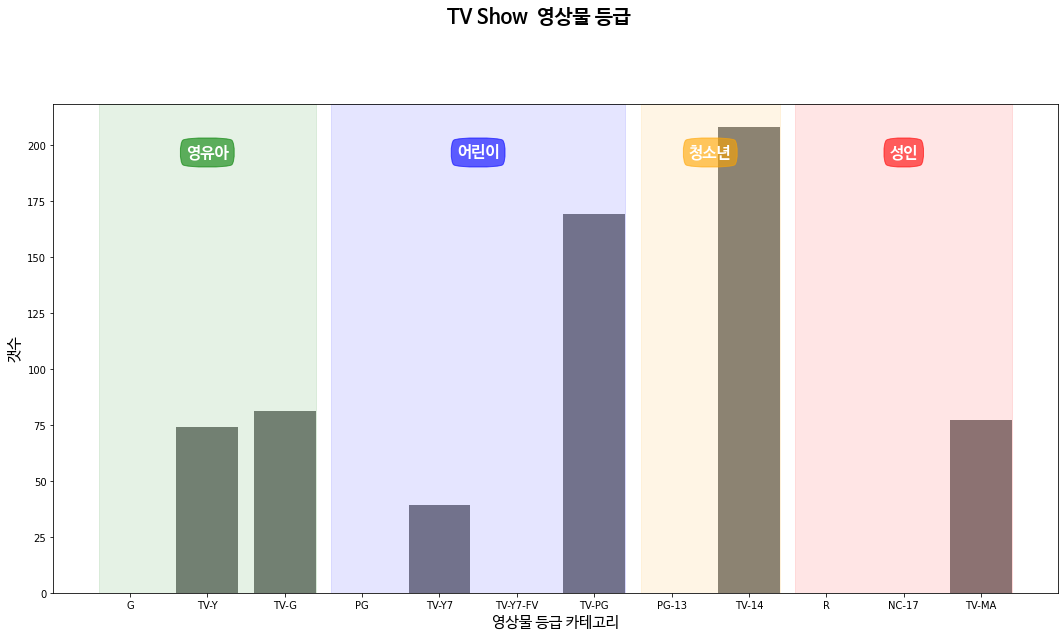

In [68]:
rating_barplot(amazon, 'Amazon Prime')
rating_barplot(amazon,'Movie')
rating_barplot(amazon,'TV Show')

디즈니
- 거의 전 연령층이 보기 좋은 영화, 드라마 많음

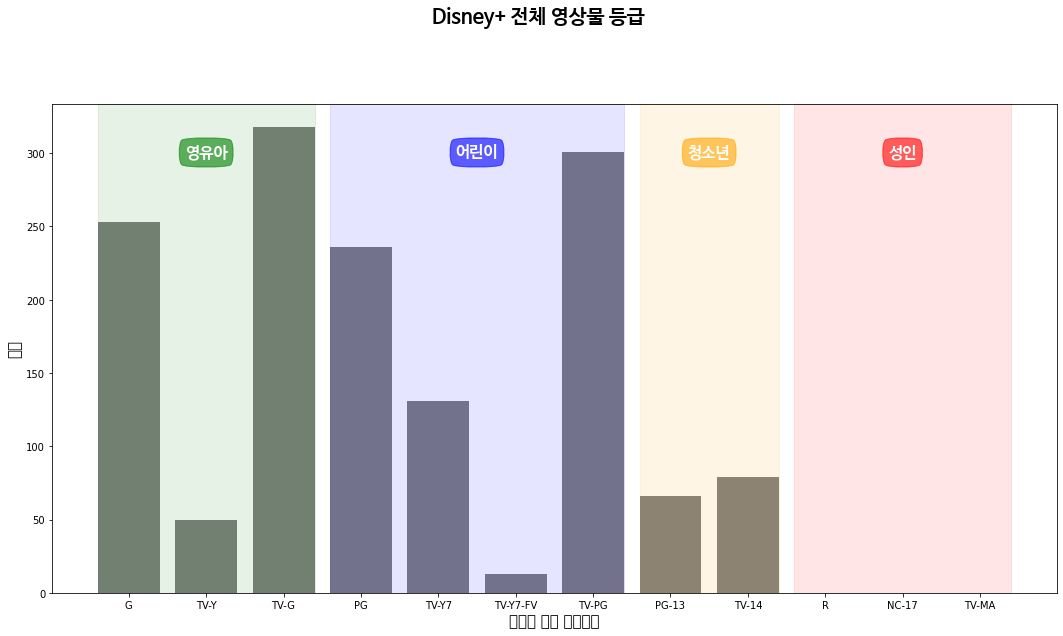

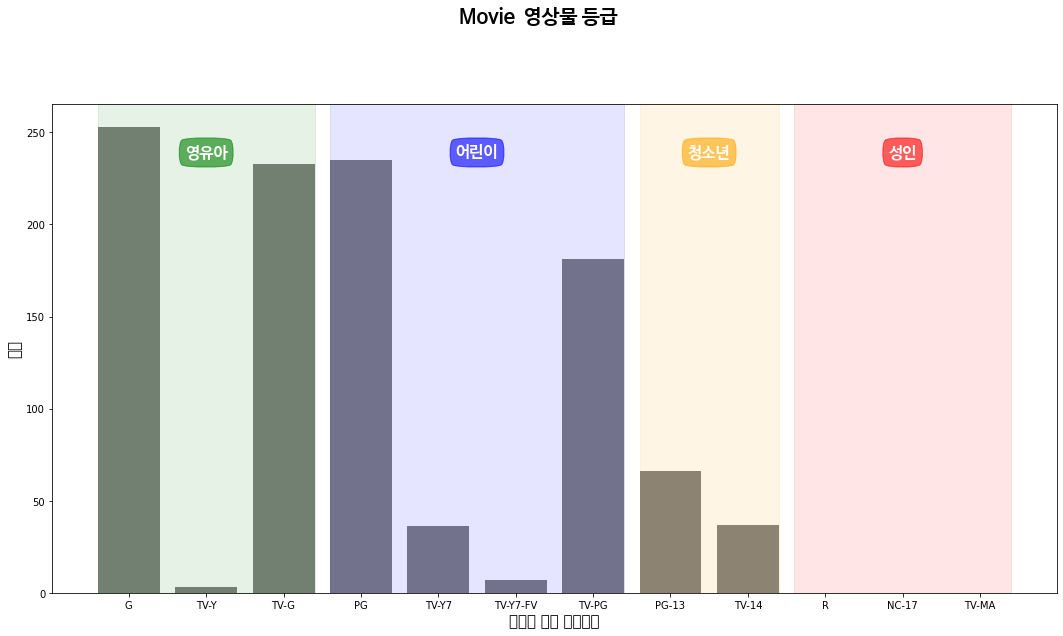

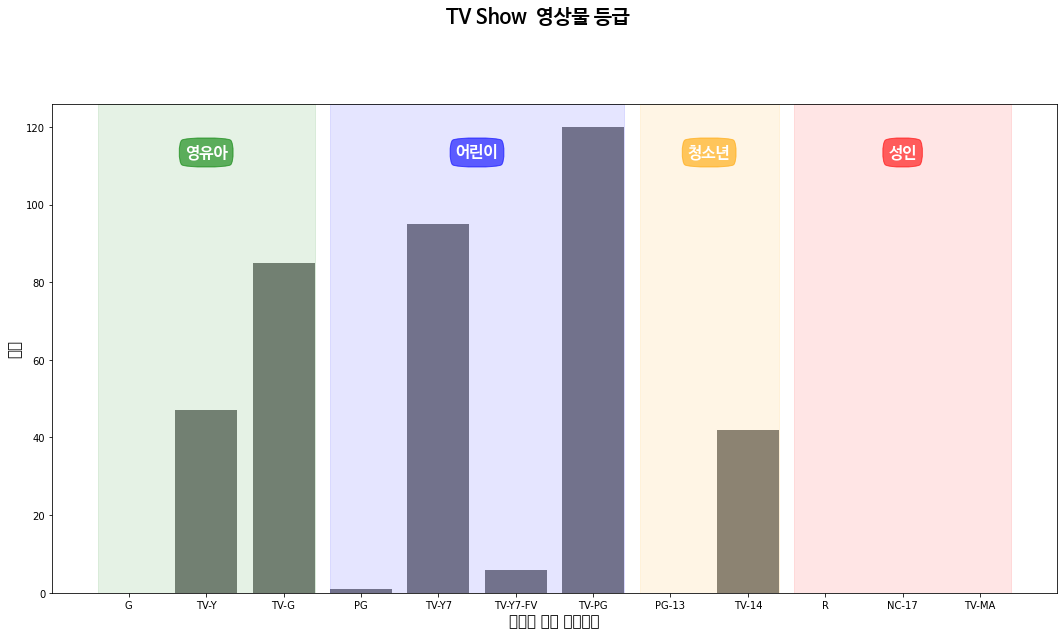

In [52]:
rating_barplot(disney, 'Disney+')
rating_barplot(disney,'Movie')
rating_barplot(disney,'TV Show')

Hulu
- 10대에 적합
- 디즈니 + 와 반대의 전략

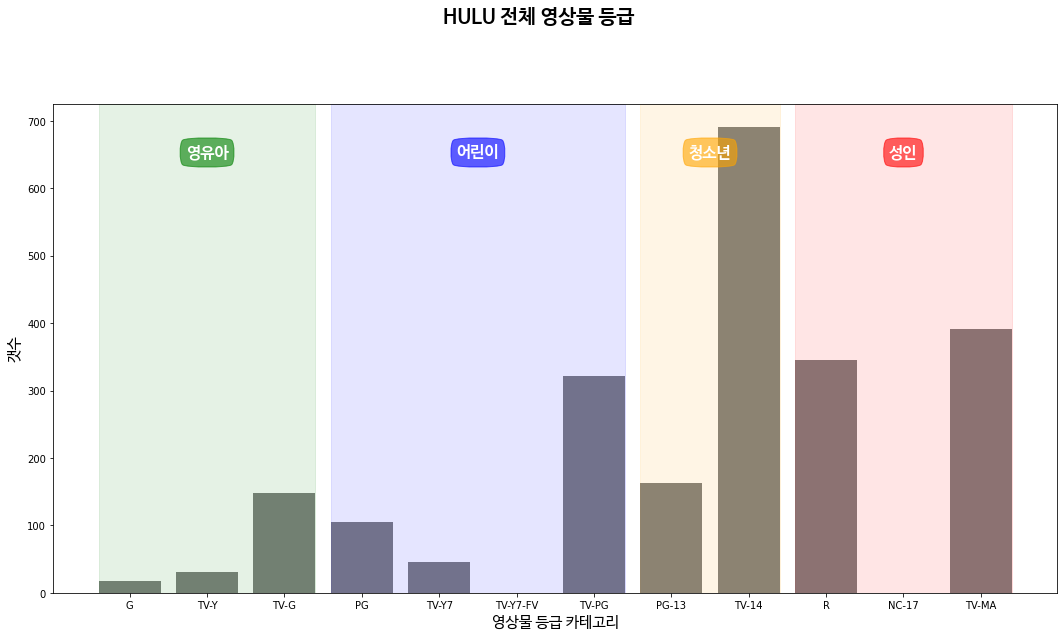

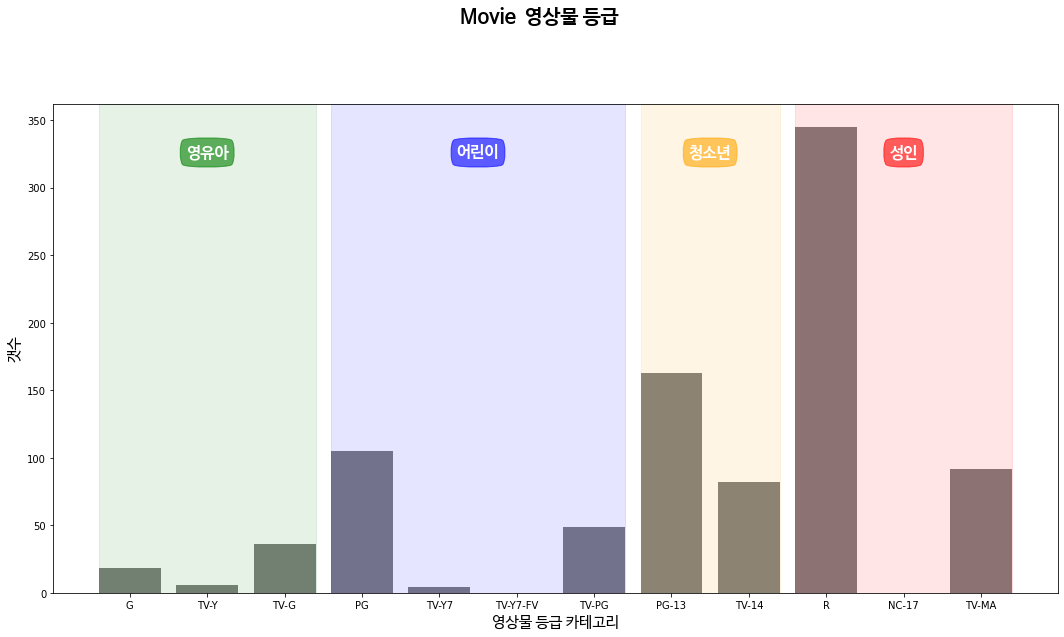

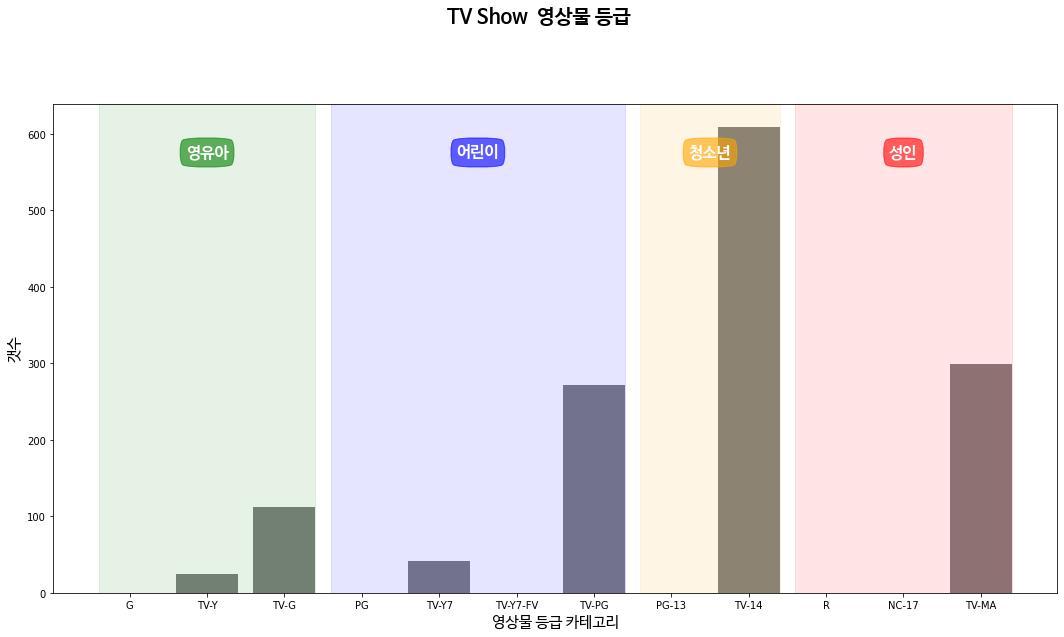

In [69]:
rating_barplot(hulu, 'HULU')
rating_barplot(hulu,'Movie')
rating_barplot(hulu,'TV Show')

### 각 오티티별 장르 비교
- 워드클라우드 시각화

In [63]:
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re

def genre_wordcloud(series,wordcloud=True):
    ''' 
    단어별 빈도수 기반으로 테이블과 워드클라우드 만들기 함수 생성
    args: series 데이터 
    return
        [0] wordcloud 그래프
        [1] 빈도수 표
    '''
    
    genres=list(series['listed_in'])
    gen=[]
    #리스트 중첩 풀기~
    for i in genres:
        i=list(i.split(','))
        for j in i:
            gen.append( re.sub(r'TV Shows|TV|Movies|[ \']','',j))
    g=Counter(gen)
    if wordcloud==True:
        text = list(set(gen))
        plt.rcParams['figure.figsize'] = (13, 13)
        wordcloud = WordCloud(max_words=1000000,background_color="white",
                             random_state=1,colormap='hot',
                              max_font_size=400,min_font_size=10).generate_from_frequencies(dict(g))
        plt.title('워드 클라우드', family='NanumBarunGothic')
        plt.imshow(wordcloud,interpolation="bilinear")
        plt.axis("off")
        plt.show()
    return wordcloud,g

- 전반적으로 인기있는 장르들은  드마라, 코미디, 액션이 상위 장르 항목으로 포함하고 있다. 

- 넷플릭스는 전반적으로 다양한 장르를 포함하고 있다.
- 아마존 드라마, 코미디,액션
- 디즈니 패밀리, 애니메이션,코미디
- 훌루 드라마, 코미디,어드벤쳐

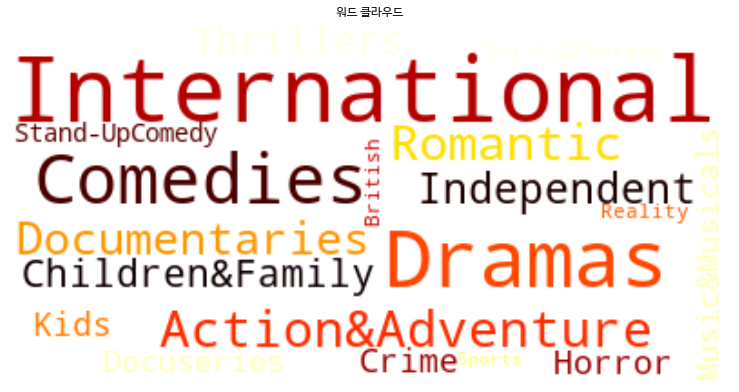

Counter({'International': 4103, 'Dramas': 3190, 'Comedies': 2255, 'Action&Adventure': 1027, 'Romantic': 986, 'Documentaries': 869, 'Independent': 756, 'Children&Family': 641, 'Thrillers': 634, 'Crime': 470, 'Kids': 451, 'Horror': 432, 'Docuseries': 395, 'Music&Musicals': 375, 'Stand-UpComedy': 343, 'Sci-Fi&Fantasy': 327, 'Reality': 255, 'British': 253, 'Sports': 219, 'AnimeSeries': 176, 'Spanish-Language': 174, 'Korean': 151, 'Classic': 116, 'LGBTQ': 102, 'Mysteries': 98, 'Science&Nature': 92, '': 73, 'AnimeFeatures': 71, 'Cult': 71, 'Teen': 69, 'Faith&Spirituality': 65, 'Stand-UpComedy&TalkShows': 56, 'Classic&Cult': 28})


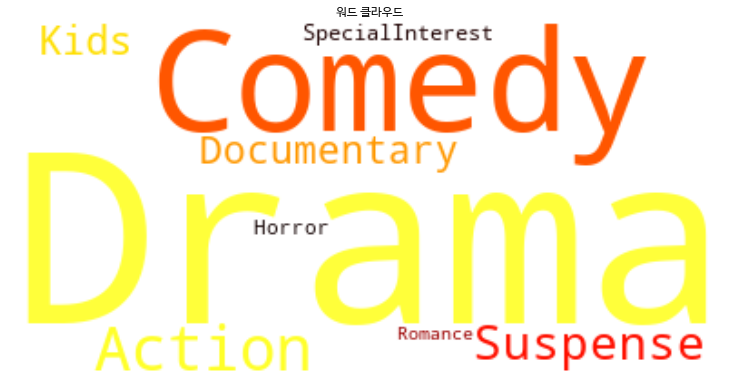

Counter({'Drama': 3687, 'Comedy': 2099, 'Action': 1657, 'Suspense': 1501, 'Kids': 1085, 'Documentary': 993, 'SpecialInterest': 980, 'Horror': 875, 'Romance': 674, 'Animation': 547, 'Arts': 483, 'Entertainment': 483, 'andCulture': 483, 'ScienceFiction': 457, 'International': 355, '': 263, 'Adventure': 259, 'Western': 234, 'Sports': 160, 'MusicVideosandConcerts': 155, 'Unscripted': 152, 'Arthouse': 141, 'LGBTQ': 113, 'YoungAdultAudience': 87, 'Fitness': 83, 'Anime': 80, 'Fantasy': 68, 'FaithandSpirituality': 66, 'MilitaryandWar': 44, 'Historical': 31, 'TalkShowandVariety': 14})


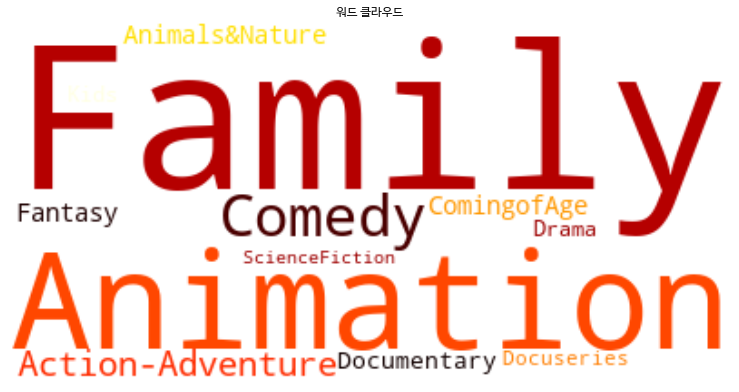

Counter({'Family': 632, 'Animation': 542, 'Comedy': 526, 'Action-Adventure': 452, 'Animals&Nature': 208, 'ComingofAge': 205, 'Fantasy': 192, 'Documentary': 174, 'Kids': 141, 'Drama': 134, 'Docuseries': 122, 'ScienceFiction': 91, 'Historical': 53, 'Music': 48, 'Musical': 44, 'Sports': 43, 'Biographical': 41, 'Buddy': 40, 'Anthology': 28, 'Reality': 26, 'Romance': 20, 'Superhero': 19, 'Crime': 16, 'Variety': 12, 'Mystery': 12, 'GameShow/Competition': 10, 'Survival': 9, 'Parody': 9, 'Lifestyle': 8, 'ConcertFilm': 7, 'Western': 7, 'Medical': 6, 'Dance': 6, 'Thriller': 5, 'Anime': 4, '': 3, 'Spy/Espionage': 3, 'Series': 3, 'RomanticComedy': 2, 'SoapOpera/Melodrama': 2, 'Disaster': 2, 'Police/Cop': 1, 'TalkShow': 1, 'Travel': 1})


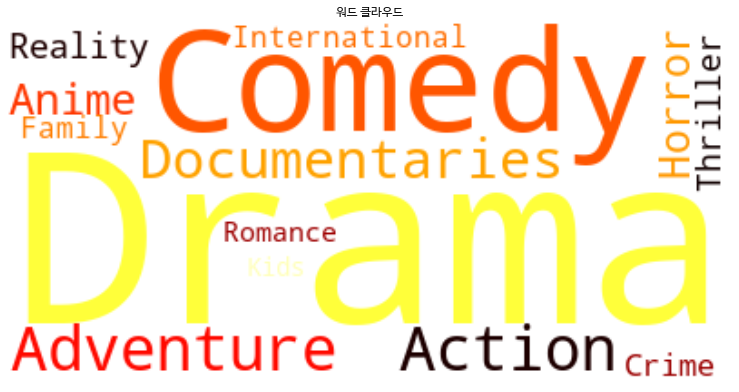

Counter({'Drama': 907, 'Comedy': 667, 'Adventure': 556, 'Action': 555, 'Documentaries': 524, 'Anime': 329, 'Horror': 304, 'Reality': 247, 'Thriller': 231, 'Crime': 217, 'International': 216, 'Family': 205, 'Romance': 186, 'Kids': 162, 'Lifestyle&Culture': 155, 'Sports': 139, 'ScienceFiction': 122, 'Sitcom': 118, 'BlackStories': 113, 'News': 106, 'Latino': 92, 'Mystery': 81, 'Cooking&Food': 80, 'Music': 79, 'History': 70, 'LGBTQ+': 67, 'Science&Technology': 48, 'AdultAnimation': 37, 'Classics': 35, 'Teen': 34, 'Cartoons': 34, 'GameShows': 18, 'StandUp': 12, 'Health&Wellness': 8, 'LateNight': 4, 'SketchComedy': 3})


In [64]:
for j in [netflix, amazon, disney, hulu]:
    print(genre_wordcloud(j)[1])

### 상위 장르 분포 비교
- 넷플릭스와 아마존은 특정 장르들에 집중
- 넷플릭스는 각 서비스하는 국가에 로컬라이제이션하기 위해서 엄청나게 투자
    - 해외 현지국(hostcountry) 콘텐츠 제작자와 공격적으로 제휴하여 제작하여 International 장르가 주를 이룸
- 아마존은 다양한 장르 커버
    - 다양한 장르와 많은 양
- 디즈니는 아이들 용
    - 전체 이용가, 애니,동물
- 훌루는 디즈니와 다른 포지셔닝
    - 아마존과 비슷하지만 제공하는 양이 적음(오리지널 컨텐츠가 주일것으로 예상)

Text(0.5, 1.0, 'HULU 장르')

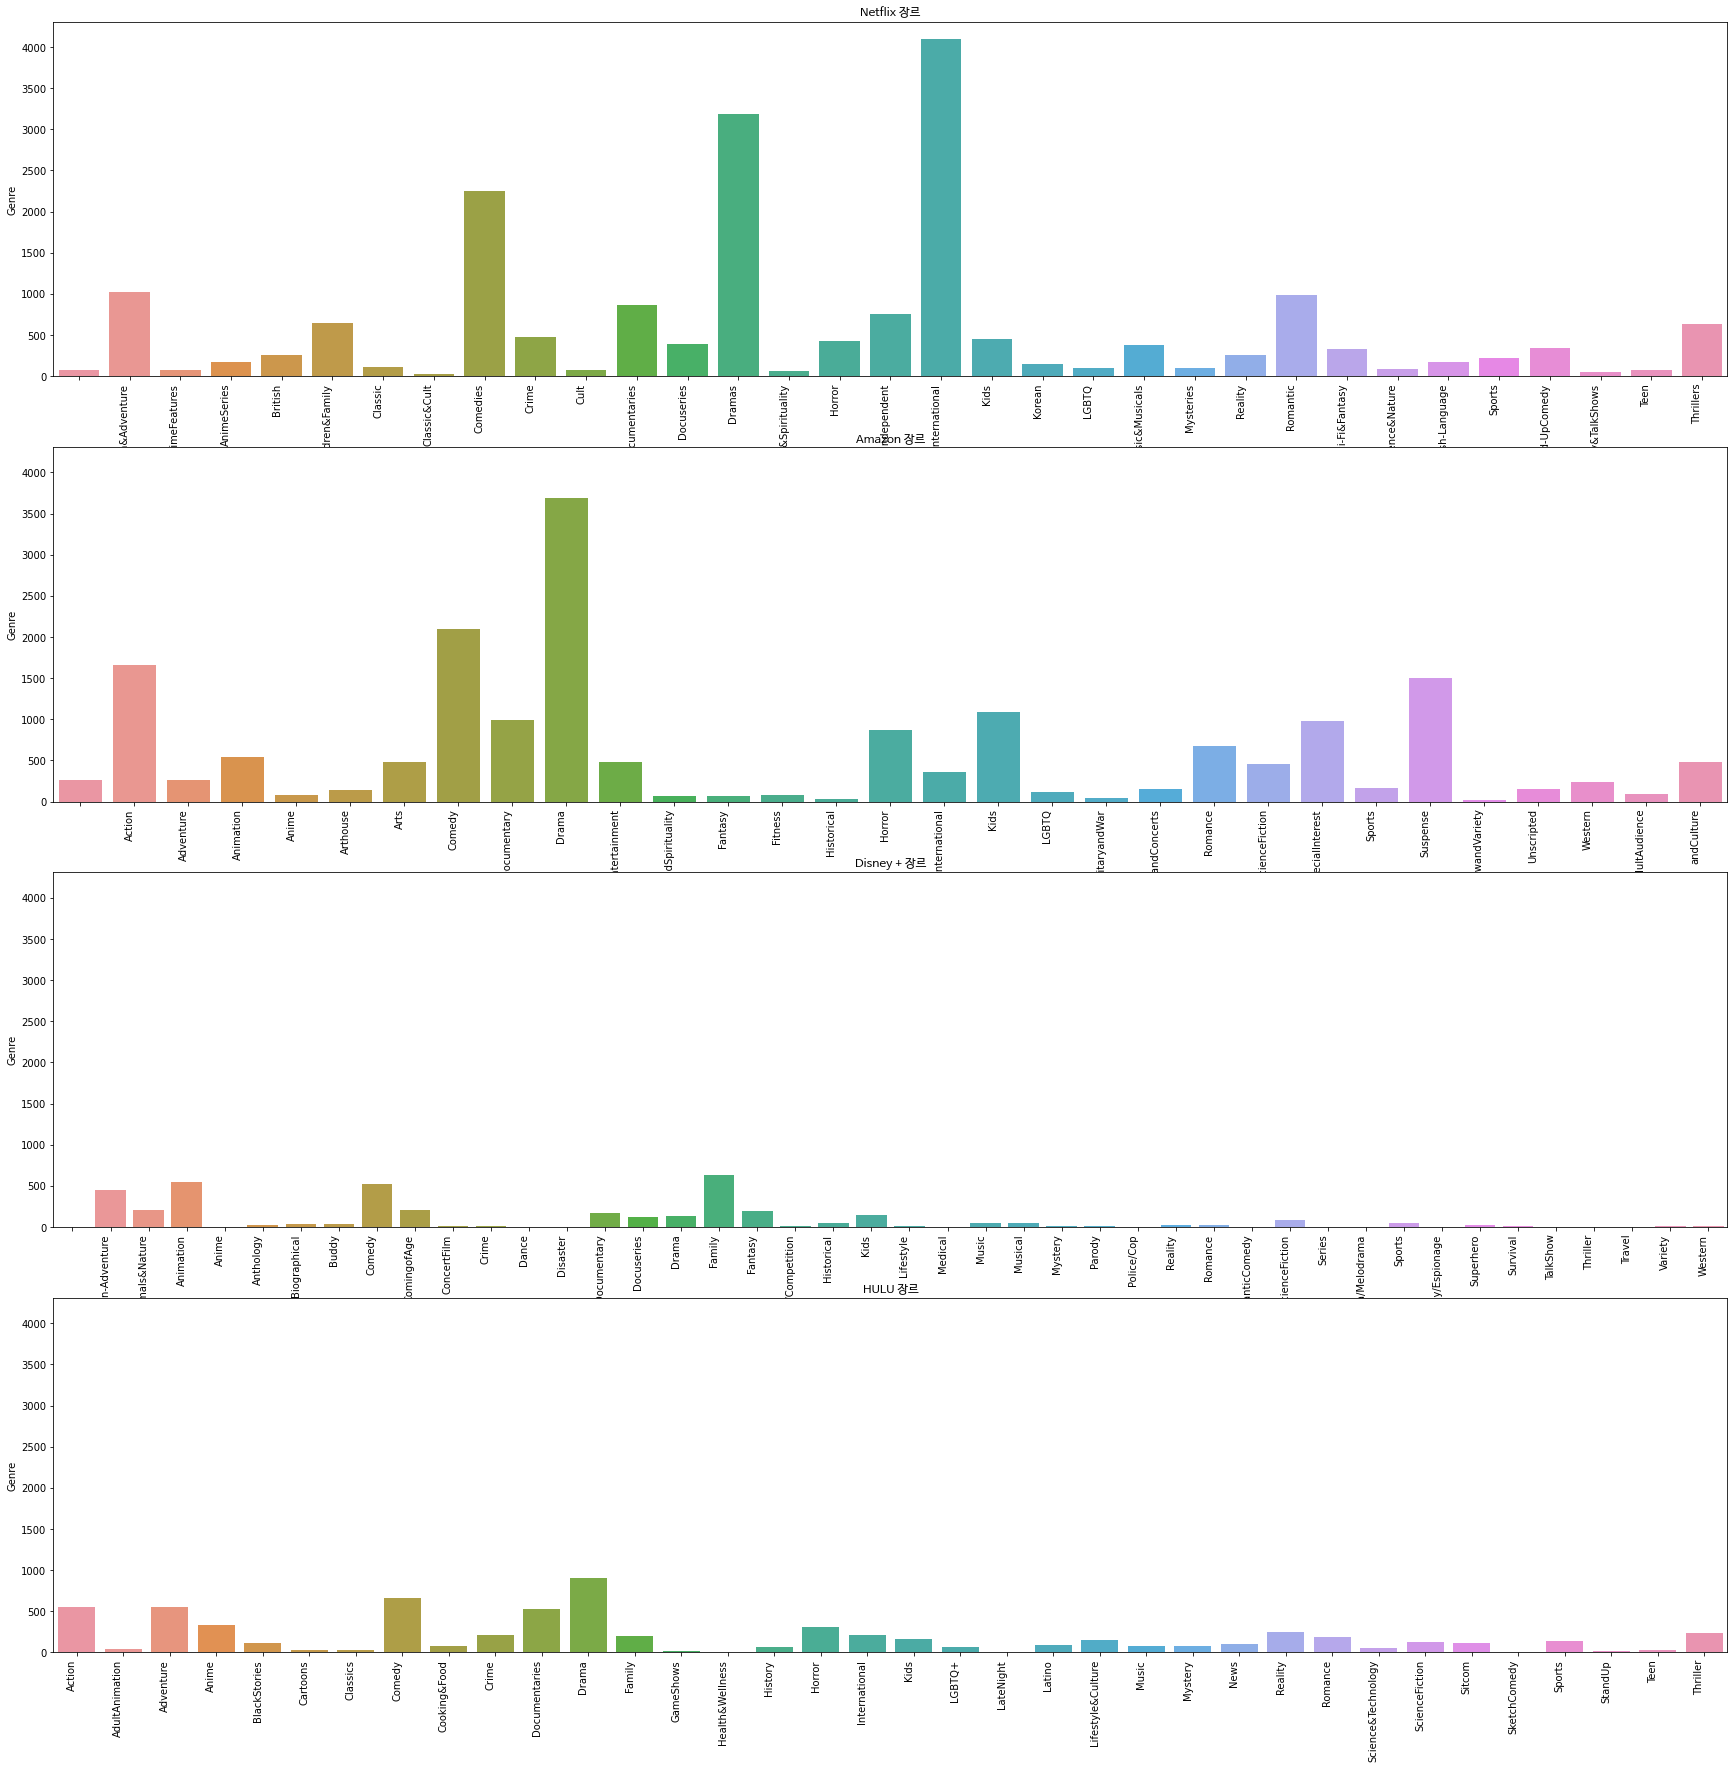

In [35]:
fig,axes=plt.subplots(4,1, figsize=(30,30),sharey=True)

netflix_genre=pd.DataFrame( { "Genre":dict(genre_wordcloud(netflix,False)[1])})
chart=sns.barplot(ax=axes[0],data=netflix_genre, y='Genre',x=netflix_genre.index, order=netflix_genre.sort_index().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.set_title('Netflix 장르', family='NanumBarunGothic')

amazon_genre=pd.DataFrame( { "Genre":dict(genre_wordcloud(amazon,False)[1])})
chart=sns.barplot(ax=axes[1],data=amazon_genre, y='Genre',x=amazon_genre.index, order=amazon_genre.sort_index().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.set_title('Amazon 장르', family='NanumBarunGothic')

disney_genre=pd.DataFrame( { "Genre":dict(genre_wordcloud(disney,False)[1])})
chart=sns.barplot(ax=axes[2],data=disney_genre, y='Genre',x=disney_genre.index, order=disney_genre.sort_index().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.set_title('Disney + 장르', family='NanumBarunGothic')


hulu_genre=pd.DataFrame( { "Genre":dict(genre_wordcloud(hulu,False)[1])})
chart=sns.barplot(ax=axes[3],data=hulu_genre, y='Genre',x=hulu_genre.index, order=hulu_genre.sort_index().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.set_title('HULU 장르', family='NanumBarunGothic')


### 각 탑 10 비교

- 넷플릭스: '인터네셔널', 드라마 코미디, 엑션,romance,다뮤,독립영화,  가족, 스릴러,범죄
    - 로컬 컨텐츠제작이 눈에 띔
- 아마존: 드라마,코미디,액션, 서스펜스, 아이들,다큐, 특이한거 ,호러 ,로맨스,애니
    - 대중적, 다양한 장르 포함
- 디즈니 : #'가족,  애니, 코미디,액션,동물,판타지', 다큐, 아이,드라마,Sci-Fi
    - 남녀노소가 무난하게 좋아할 만한 장르
    - 장르 골고루 분포
- 훌루 :#드라마 코미디 ,모험, 다큐,에니, 호러, 리얼리티 쇼,스릴러,범죄
    - 장르 골고루 분포

Text(0.5, 1.0, 'HULU 장르')

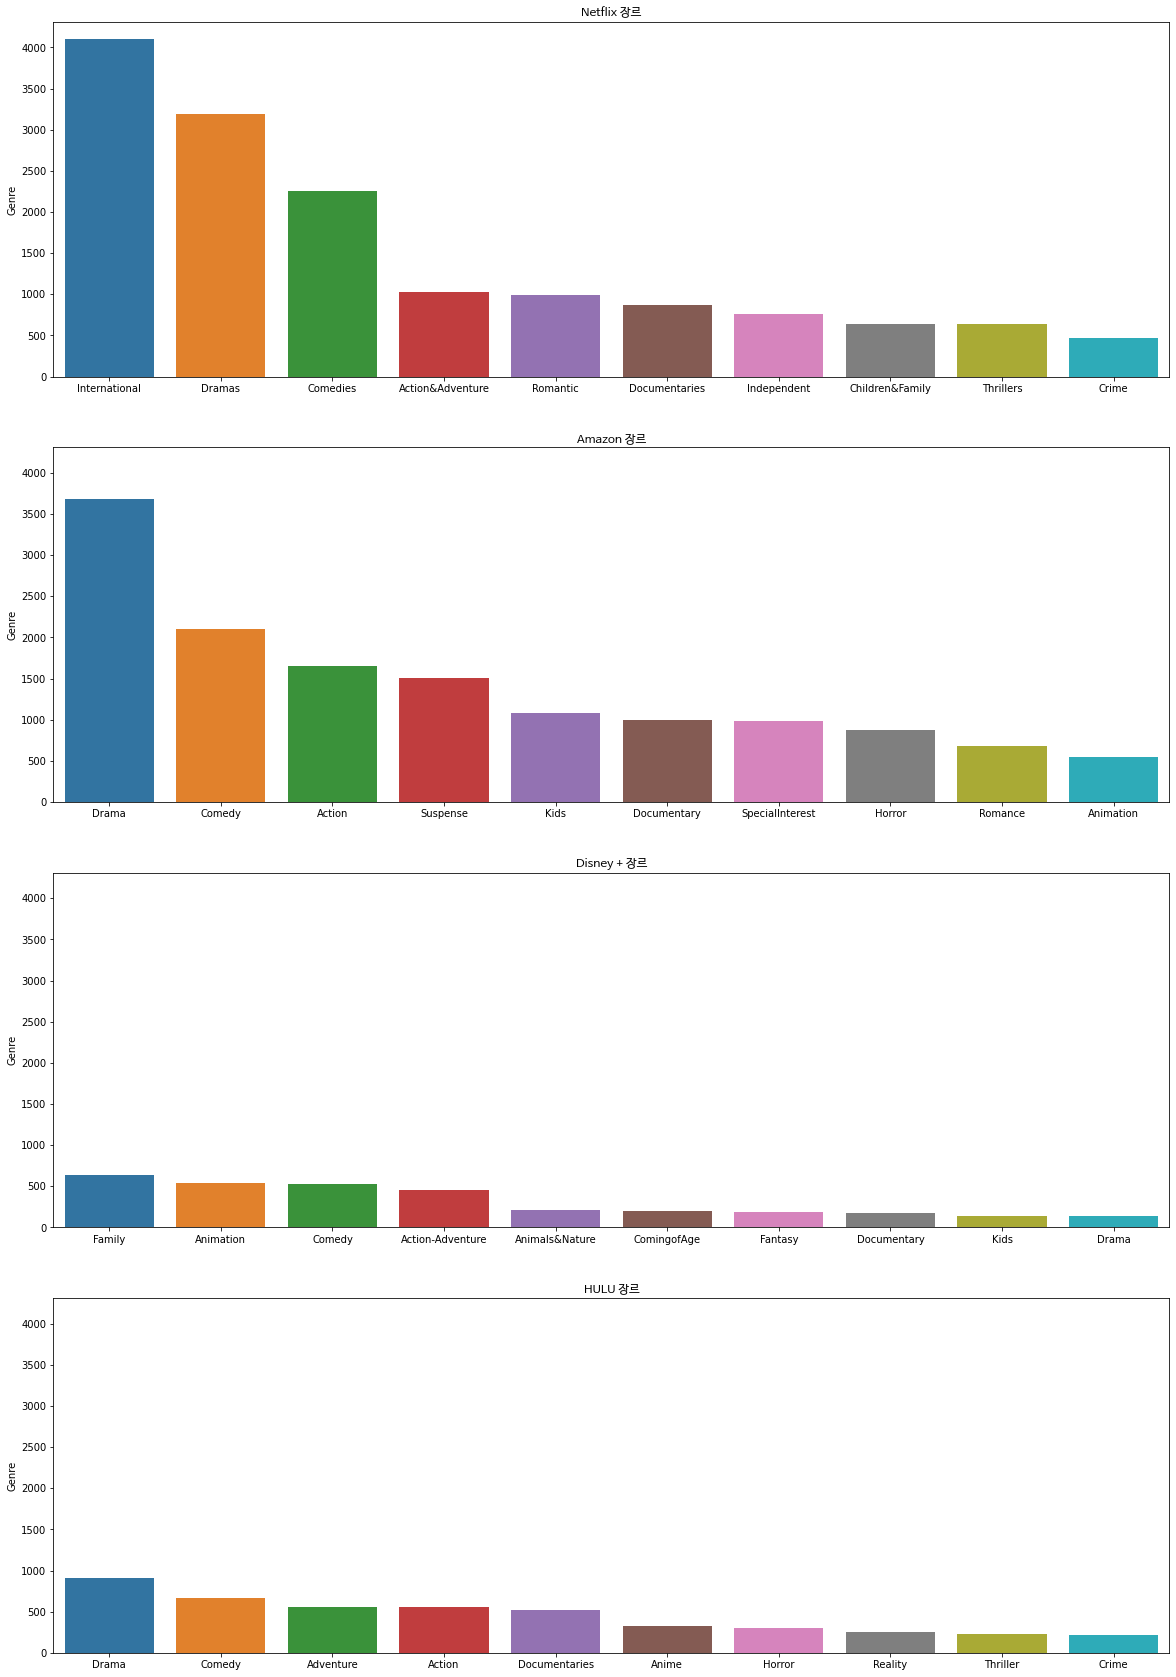

In [37]:
#가장 많은 탑 텐 확인하기
fig,axes=plt.subplots(4,1, figsize=(20,30), sharey=True)

netflix_genre=pd.DataFrame( { "Genre":dict(genre_wordcloud(netflix,False)[1].most_common(10))})
sns.barplot(ax=axes[0],data=netflix_genre, y='Genre',x=netflix_genre.index, order=netflix_genre.sort_values('Genre').index[::-1])\
.set_title('Netflix 장르', family='NanumBarunGothic')

amazon_genre=pd.DataFrame( { "Genre":dict(genre_wordcloud(amazon,False)[1].most_common(10))})
sns.barplot(ax=axes[1],data=amazon_genre, y='Genre',x=amazon_genre.index, order=amazon_genre.sort_values('Genre').index[::-1])\
.set_title('Amazon 장르', family='NanumBarunGothic')

disney_genre=pd.DataFrame( { "Genre":dict(genre_wordcloud(disney,False)[1].most_common(10))})
sns.barplot(ax=axes[2],data=disney_genre, y='Genre',x=disney_genre.index, order=disney_genre.sort_values('Genre').index[::-1])\
.set_title('Disney + 장르', family='NanumBarunGothic')

hulu_genre=pd.DataFrame( { "Genre":dict(genre_wordcloud(hulu,False)[1].most_common(10))})
sns.barplot(ax=axes[3],data=hulu_genre, y='Genre',x=hulu_genre.index, order=hulu_genre.sort_values('Genre').index[::-1])\
.set_title('HULU 장르', family='NanumBarunGothic')


### 탑 장르 10 특징
- 넷플릭스: 인터네셔널,드라마, 코미디 
- 아마존: 범죄,액션
- 디즈니 : 에니, 코미디, 호러?
- 훌루:코미디, 다큐,드라마

[Text(0.5, 1.0, 'Hulu')]

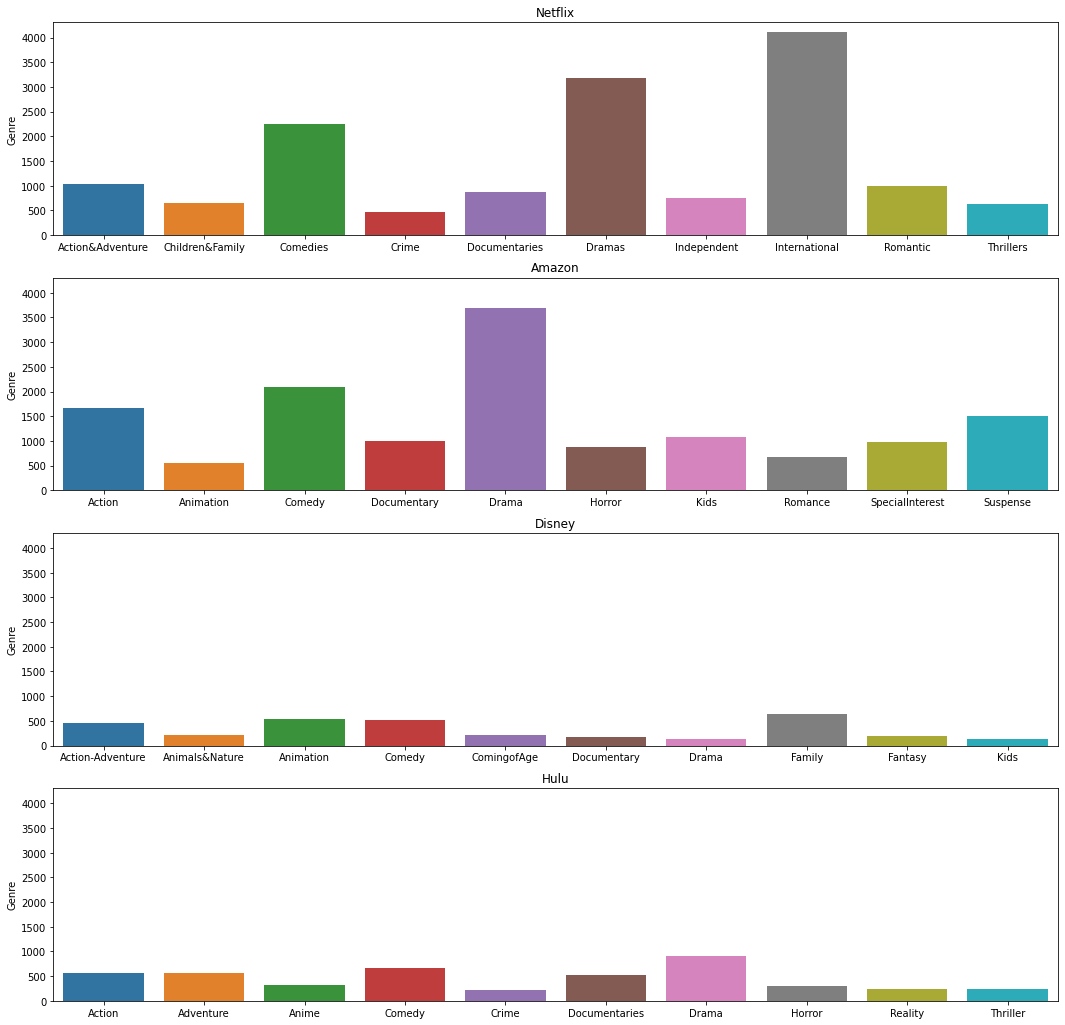

In [17]:

fig,axes=plt.subplots(4,1, figsize=(18,18 ), sharey=True)

sns.barplot(ax=axes[0] ,data=netflix_genre, y='Genre',x=netflix_genre.index).set(title='Netflix')
sns.barplot(ax=axes[1] ,data=amazon_genre, y='Genre',x=amazon_genre.index).set(title='Amazon')
sns.barplot(ax=axes[2] ,data=disney_genre, y='Genre',x=disney_genre.index).set(title='Disney')
sns.barplot(ax=axes[3] ,data=hulu_genre, y='Genre',x=hulu_genre.index).set(title='Hulu')


### 컨텐츠 제작 국가
- 넷플릭스가 가장 다양한 국가에서 만든 컨텐츠가 제일 많음, 동아시아권 국가 상위랭크에 들어가며 다양한 대륙의 국가들 포함함
    - 넷플릭스의 시장 동화 전략으로 보임
- 아마존은 인도, 미국이 대부분, 나머지 유럽권
- 디즈니는 미국중심으로 국제 공동 제작
- 훌루 미국이 대부분이나 일본 컨텐츠 의외로 많음

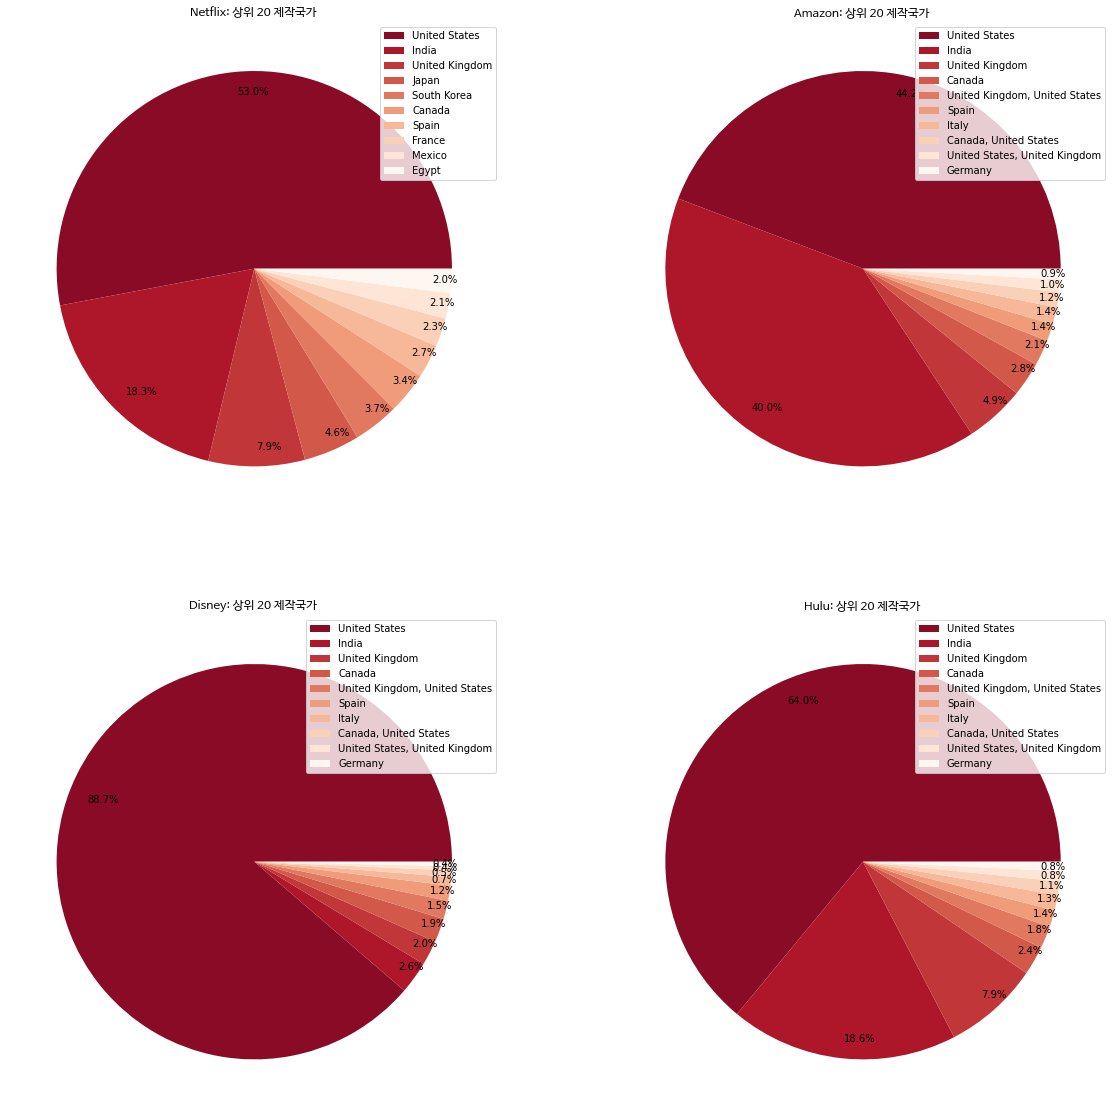

In [40]:
top20_countries_n=netflix.country.value_counts()[:10]
top20_countries_a=amazon.country.value_counts()[:10]
top20_countries_d=disney.country.value_counts()[:10]
top20_countries_h=hulu.country.value_counts()[:10]
fig,axes=plt.subplots(2,2, figsize=(20,20))
axes[0][0].pie(top20_countries_n,startangle=0,
            autopct= '%1.1f%%',pctdistance=0.9, labeldistance=1.2,rotatelabels=True,
            textprops = dict(rotation_mode = 'anchor', va='center', ha='left'),
            colors=sns.color_palette("RdGy", n_colors=20))
axes[0][0].set_title('Netflix: 상위 20 제작국가 ', family='NanumBarunGothic')

axes[0][0].legend(top20_countries_n.index,loc='upper right')

axes[0][1].pie(top20_countries_a,startangle=0,
            autopct= '%1.1f%%',pctdistance=.9, labeldistance=1.2,rotatelabels=True,
            textprops = dict(rotation_mode = 'anchor', va='center', ha='left'),
            colors=sns.color_palette("RdGy", n_colors=20))
axes[0][1].set_title('Amazon: 상위 20 제작국가 ', family='NanumBarunGothic')

axes[0][1].legend(labels=top20_countries_a.index)

axes[1][0].pie(top20_countries_d,startangle=0,
            autopct= '%1.1f%%',pctdistance=.9, labeldistance=1.2,rotatelabels=True,
            textprops = dict(rotation_mode = 'anchor', va='center', ha='left'),
            colors=sns.color_palette("RdGy", n_colors=20))
axes[1][0].set_title('Disney: 상위 20 제작국가 ', family='NanumBarunGothic')
axes[1][0].legend(labels=top20_countries_a.index)


axes[1][1].pie(top20_countries_h,startangle=0,
            autopct= '%1.1f%%',pctdistance=.9, labeldistance=1.2,rotatelabels=True,
            textprops = dict(rotation_mode = 'anchor', va='center', ha='left'),
            colors=sns.color_palette("RdGy", n_colors=20))
axes[1][1].set_title('Hulu: 상위 20 제작국가 ', family='NanumBarunGothic')

axes[1][1].legend(labels=top20_countries_a.index)



Text(0.5, 1.03, 'Top 10 제작국(Hulu)')

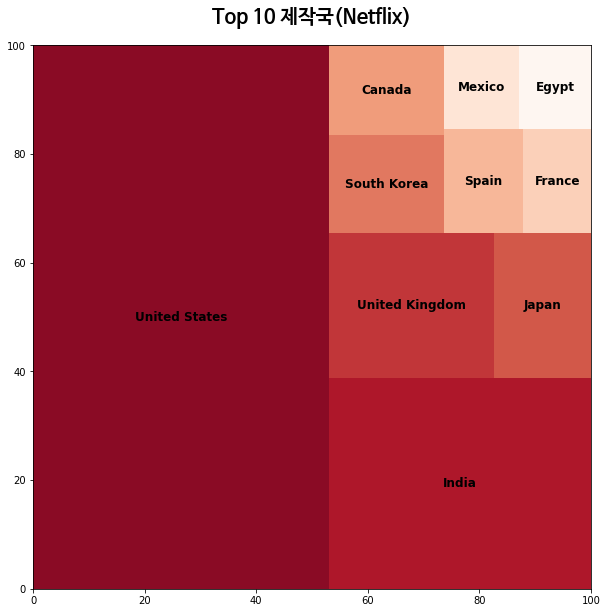

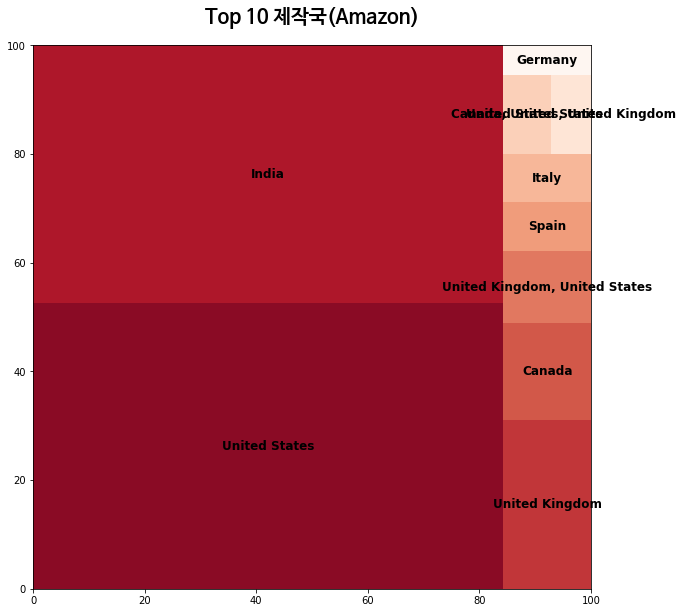

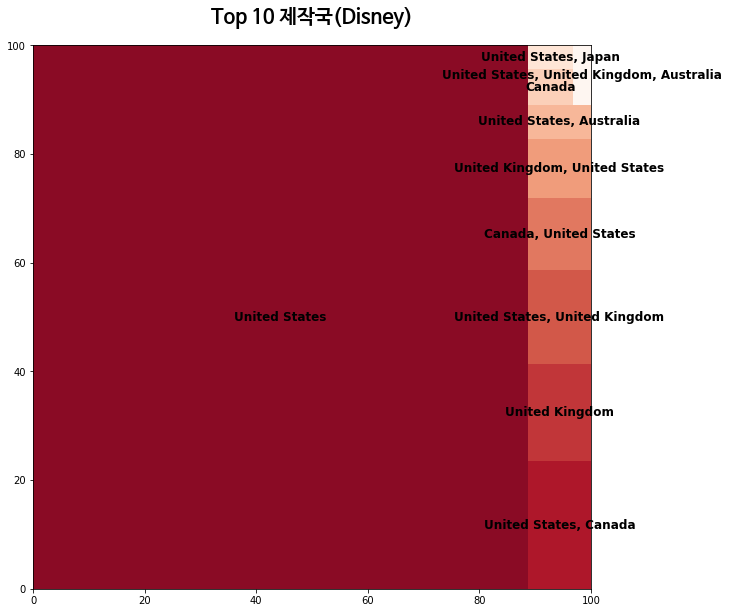

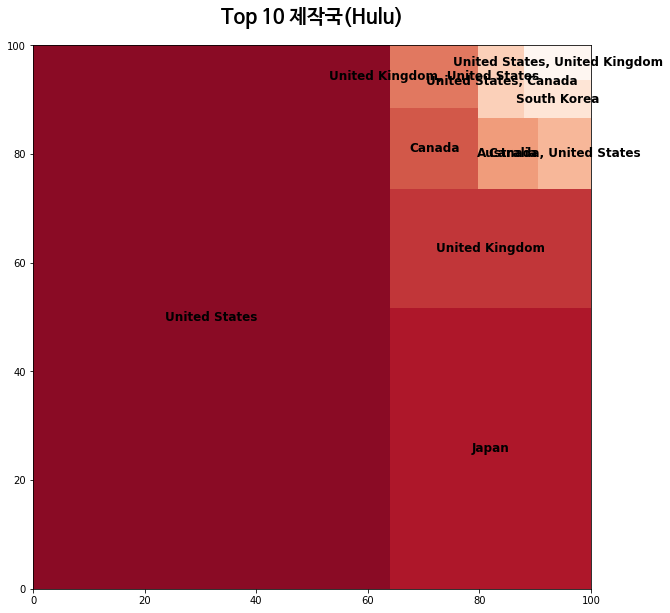

In [41]:
!pip install squarify
import squarify

y = top20_countries_n
fig = plt.figure(figsize=(10, 10))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':12, 'fontweight' : 'bold'})
plt.title('Top 10 제작국(Netflix)', position=(0.5, 1.0+0.03), 
          fontsize = 20, fontweight='bold', family='NanumBarunGothic')

y = top20_countries_a
fig = plt.figure(figsize=(10, 10))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':12, 'fontweight' : 'bold'})
plt.title('Top 10 제작국(Amazon)', position=(0.5, 1.0+0.03), 
          fontsize = 20, fontweight='bold', family='NanumBarunGothic')

y = top20_countries_d
fig = plt.figure(figsize=(10, 10))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':12, 'fontweight' : 'bold'})
plt.title('Top 10 제작국(Disney)', position=(0.5, 1.0+0.03),
          fontsize = 20, fontweight='bold', family='NanumBarunGothic')

y = top20_countries_h
fig = plt.figure(figsize=(10, 10))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':12, 'fontweight' : 'bold'})
plt.title('Top 10 제작국(Hulu)', position=(0.5, 1.0+0.03),
          fontsize = 20, fontweight='bold', family='NanumBarunGothic')


### 시간에 따른 콘텐츠 제작국 변화
시간이 지남에 따라 소유한 콘텐츠의 제작 국가가 어디가 제일 많은지 지도로 동적인 지도로 시각화

In [20]:
import plotly.express as px

country_release_n = netflix.country.value_counts().reset_index(name='counts')
country_release_n.rename(columns={'index':'country'},inplace=True)
country_release_n

,country,counts
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
...,...,...
743,"China, Spain, South Korea, United States",1
744,"Iceland, Sweden, Belgium",1
745,"France, Canada, Italy, United States, China",1
746,"New Zealand, United Kingdom, Australia",1


In [21]:
fig = px.choropleth(country_release_n, locations="country", color="counts", 
                    locationmode='country names',
                    range_color=[0,4],                           
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Netflix : 컨텐츠 제작국')
fig.show()

넷플릭스는 초기에는 영어권국가로 시작해서 다양한 국가의 컨텐츠를 점차 늘려나감

In [22]:
country_release_n = netflix.groupby('release_year')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(country_release_n, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='release_year',
                    range_color=[0,10],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Netflix : 컨텐츠 개봉일과 제작국')
fig.show()

아마존
- 미국과 인도를 중심으로 함

In [23]:
country_release_n = amazon.groupby('release_year')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(country_release_n, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='release_year',
                    range_color=[0,10],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Amazon : 컨텐츠 개봉일과 제작국')
fig.show()

Disney
- 미국을 중심 컨텐츠 제작

In [24]:
country_release_n = disney.groupby('release_year')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(country_release_n, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='release_year',
                    range_color=[0,10],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Disney : 컨텐츠 개봉일과 제작국')
fig.show()

HULU

- 북미와 일본 중심의 컨텐츠로 전향하고 있음
- 실제로도 미국, 일본에만 서비스 중

In [25]:
country_release_n = hulu.groupby('release_year')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(country_release_n, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='release_year',
                    range_color=[0,10],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Hulu : 컨텐츠 개봉일과 제작국')
fig.show()

### 각 서비스별 컨텐츠 개봉일 비교
- 아마존이 가장 최신 컨텐츠가 많음
- 넷플릭스와 훌루는 최신에서 약간 지난 컨텐츠가 많음(특히 넷플)
- 모든 회사들은 1900년대 초 컨텐츠 소유량은 비슷하나 아마존이 우세


#### 전체
- 넷플릭스와 훌루는 비슷한 패턴을 보임
- 최신 컨텐츠는 아마존이 압도적으로 많음

Text(0.5, 1.0, '전체 컨텐츠 개봉일 비교')

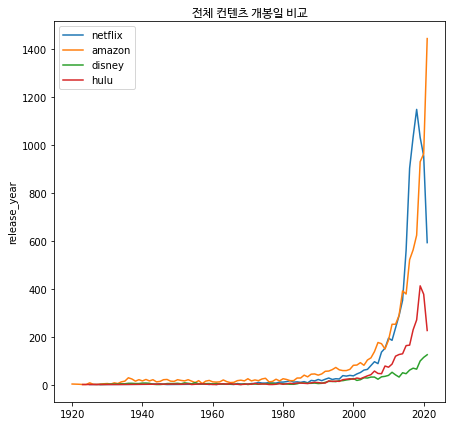

In [42]:
fig = plt.figure(figsize=(7, 7))

sns.lineplot(y=netflix.release_year.value_counts(),x= netflix.release_year.value_counts().index)
sns.lineplot(y=amazon.release_year.value_counts(),x= amazon.release_year.value_counts().index)
sns.lineplot(y=disney.release_year.value_counts(),x= disney.release_year.value_counts().index)
sns.lineplot(y=hulu.release_year.value_counts(),x= hulu.release_year.value_counts().index)
plt.legend(labels=['netflix', 'amazon','disney','hulu'])
plt.title('전체 컨텐츠 개봉일 비교', family='NanumBarunGothic')

#### 영화
- 최신영화는 아마존이 압도적으로 많음
- 넷플릭스와 훌루는 비슷한 패턴을 보임

Text(0.5, 1.0, '영화 개봉일 비교')

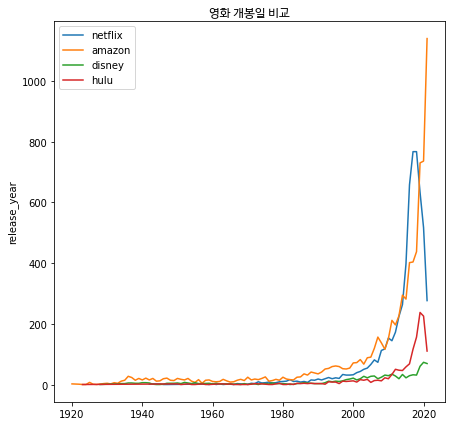

In [43]:
fig = plt.figure(figsize=(7, 7))

sns.lineplot(y=netflix[netflix['type']=='Movie'].release_year.value_counts(),x= netflix[netflix['type']=='Movie'].release_year.value_counts().index)
sns.lineplot(y=amazon[amazon['type']=='Movie'].release_year.value_counts(),x= amazon[amazon['type']=='Movie'].release_year.value_counts().index)
sns.lineplot(y=disney[disney['type']=='Movie'].release_year.value_counts(),x= disney[disney['type']=='Movie'].release_year.value_counts().index)
sns.lineplot(y=hulu[hulu['type']=='Movie'].release_year.value_counts(),x= hulu[hulu['type']=='Movie'].release_year.value_counts().index)
plt.legend(labels=['netflix', 'amazon','disney','hulu'])
plt.title('영화 개봉일 비교', family='NanumBarunGothic')

#### 티비시리즈
- 넷플릭스가 티비시리즈는 압도적으로 많음 
- 넷플릭스와 훌루는 계속 비슷한 패턴을 보임
- 아마존과 디즈니는 새로운 컨텐츠 제작에 힘을 쓰고 있음

Text(0.5, 1.0, 'TV 개봉일 비교')

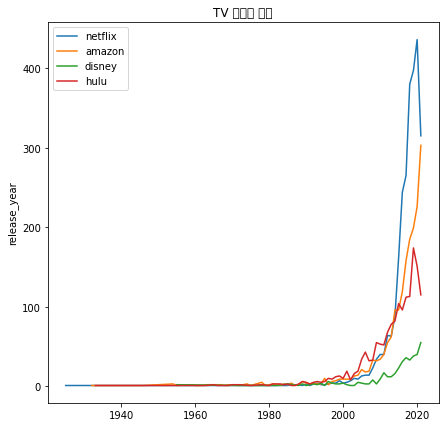

In [28]:
fig = plt.figure(figsize=(7, 7))

sns.lineplot(y=netflix[netflix['type']=='TV Show'].release_year.value_counts(),x= netflix[netflix['type']=='TV Show'].release_year.value_counts().index)
sns.lineplot(y=amazon[amazon['type']=='TV Show'].release_year.value_counts(),x= amazon[amazon['type']=='TV Show'].release_year.value_counts().index)
sns.lineplot(y=disney[disney['type']=='TV Show'].release_year.value_counts(),x= disney[disney['type']=='TV Show'].release_year.value_counts().index)
sns.lineplot(y=hulu[hulu['type']=='TV Show'].release_year.value_counts(),x= hulu[hulu['type']=='TV Show'].release_year.value_counts().index)
plt.legend(labels=['netflix', 'amazon','disney','hulu'])
plt.title('TV 개봉일 비교', family='NanumBarunGothic')